### Loading previously created dictionaries

#### Load the dictionary with the spikes reduced at 1 Hz 

In [1]:
import pickle
import time
import numpy as np
from matplotlib import pyplot as plt

We extracted the spiking activity, from the continuos data, using the Spyking-circus algorithm [CITE], separately for each of the 32 channels implanted in each mouse. Briefly, we used a template with a width of 2 ms, and a threshold detection factor equal to 4. The continuous data was filtered with a band pass filter between 300 Hz and the Nyquist frequency, with a merge and an overlap factors equals to 1 (because the analysis was computed separately for each channel).

The obtained raw spiking activity was collapsed from 30 KHz to bins of 1 Hz (1 second). Then, we extracted a baseline (HC) period of 2 min length, finishing 15 seconds before the beginning of the OF, and a task (OF) period, beginning 15 seconds after the start of the OF, and continuing until the end of the 10 minutes OF (total length of the task period: 9.75 min). After that, the spiking activity was normalised by obtained the mean activity of the collapsed data and subtracting it to the data, separately for each channel and the baseline and task periods. Grand-average activity was obtained by averaging the normalised units activity by structure, and then averaging it across mice, separately for  each structure and condition.

In [2]:
npys_dir = '/home/maspe/filer/SERT/ALL/npys/'

### For WTs:
with open(npys_dir + 'reduced_WT.spikes', 'rb') as f:
    reduced_spikes_WT = pickle.load(f) #, encoding='latin1')
    
with open('/home/maspe/filer/SERT/ALL/npys/channels_by_spikes_WT.info', 'rb') as f:
    all_channels_WT = pickle.load(f)
    

### For KOs:
with open(npys_dir + 'reduced_KO.spikes', 'rb') as f:
    reduced_spikes_KO = pickle.load(f) #, encoding='latin1')
    
with open('/home/maspe/filer/SERT/ALL/npys/channels_by_spikes_KO.info', 'rb') as f:
    all_channels_KO = pickle.load(f)

#### Normalise the spikes, separately for baseline (2 min of HC, previous to OF) and OF (10 min task)

In [3]:
### Extract a windows of n_secs length at the beginning and end of the task
n_min = 2
sample_rate = 1
start_OF = n_min * 60 * sample_rate # After first 2 minutes at 1 Hz

### For WTs
normalised_spikes_WT = {}
for mouse in reduced_spikes_WT.keys():
    mice_matrix = reduced_spikes_WT[mouse]
    
    #n_units = mice_matrix.shape[0]
    
    # Create baseline normalised by the mean
    # Solution from: https://stackoverflow.com/questions/26333005/numpy-subtract-every-row-of-matrix-by-vector/26333184
    baseline = (mice_matrix[:, :start_OF].T - np.mean(mice_matrix[:, :start_OF], axis=1)).T
    OF = (mice_matrix[:, start_OF:].T - np.mean(mice_matrix[:, start_OF:], axis=1)).T 
    
    normalised_spikes_WT[mouse] = np.concatenate([baseline, OF], axis=1)


### For WTs
normalised_spikes_KO = {}
for mouse in reduced_spikes_KO.keys():
    mice_matrix = reduced_spikes_KO[mouse]
    
    #n_units = mice_matrix.shape[0]
    
    # Create baseline normalised by the mean
    # Solution from: https://stackoverflow.com/questions/26333005/numpy-subtract-every-row-of-matrix-by-vector/26333184
    baseline = (mice_matrix[:, :start_OF].T - np.mean(mice_matrix[:, :start_OF], axis=1)).T
    OF = (mice_matrix[:, start_OF:].T - np.mean(mice_matrix[:, start_OF:], axis=1)).T 
    
    normalised_spikes_KO[mouse] = np.concatenate([baseline, OF], axis=1)


In [4]:
### ALL CHANNELS COULD BE JUST ONE DICT FOR WTs AND KOs!!!!!!!
### NORMALISED_SPIKES ALSO!!!!!!!
### For WTs
iteration = 0
for mouse in normalised_spikes_WT.keys():
    mPFC_indexes = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'mPFC_left']
    NAC_indexes  = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'NAC_left']
    BLA_indexes  = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'BLA_left']
    vHip_indexes = [i for i,x in enumerate(all_channels_WT[mouse]) if x == 'vHipp_left']
    
    if iteration == 0:
        mPFC_WT = np.mean(normalised_spikes_WT[mouse][mPFC_indexes, :], axis=0)
        NAC_WT  = np.mean(normalised_spikes_WT[mouse][NAC_indexes, :],  axis=0)
        BLA_WT  = np.mean(normalised_spikes_WT[mouse][BLA_indexes, :],  axis=0)
        vHip_WT = np.mean(normalised_spikes_WT[mouse][vHip_indexes, :], axis=0)
        
    else:
        mPFC_WT = np.vstack((mPFC_WT, np.mean(normalised_spikes_WT[mouse][mPFC_indexes, :], axis=0)))
        NAC_WT  = np.vstack((NAC_WT,  np.mean(normalised_spikes_WT[mouse][NAC_indexes, :],  axis=0)))
        BLA_WT  = np.vstack((BLA_WT,  np.mean(normalised_spikes_WT[mouse][BLA_indexes, :],  axis=0)))
        vHip_WT = np.vstack((vHip_WT, np.mean(normalised_spikes_WT[mouse][vHip_indexes, :], axis=0)))
        
    iteration =+ 1
    

### For KOs
iteration = 0
for mouse in normalised_spikes_KO.keys():
    mPFC_indexes = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'mPFC_left']
    NAC_indexes  = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'NAC_left']
    BLA_indexes  = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'BLA_left']
    vHip_indexes = [i for i,x in enumerate(all_channels_KO[mouse]) if x == 'vHipp_left']
    
    if iteration == 0:
        mPFC_KO = np.mean(normalised_spikes_KO[mouse][mPFC_indexes, :], axis=0)
        NAC_KO  = np.mean(normalised_spikes_KO[mouse][NAC_indexes, :],  axis=0)
        BLA_KO  = np.mean(normalised_spikes_KO[mouse][BLA_indexes, :],  axis=0)
        vHip_KO = np.mean(normalised_spikes_KO[mouse][vHip_indexes, :], axis=0)
        
    else:
        mPFC_KO = np.vstack((mPFC_KO, np.mean(normalised_spikes_KO[mouse][mPFC_indexes, :], axis=0)))
        NAC_KO  = np.vstack((NAC_KO,  np.mean(normalised_spikes_KO[mouse][NAC_indexes, :],  axis=0)))
        BLA_KO  = np.vstack((BLA_KO,  np.mean(normalised_spikes_KO[mouse][BLA_indexes, :],  axis=0)))
        vHip_KO = np.vstack((vHip_KO, np.mean(normalised_spikes_KO[mouse][vHip_indexes, :], axis=0)))
        
    iteration =+ 1


In [ ]:
#npys_dir = '/home/maspe/filer/SERT/ALL/npys/'

#all_spikes_WT = {'mPFC': mPFC_WT, 'BLA': BLA_WT, 'NAC': NAC_WT, 'vHip': vHip_WT}
#np.save('/home/maspe/filer/SERT/ALL/npys/all_spikes_WT', all_spikes_WT)

In [11]:
WT_grandAverage = {'mPFC': {'mean': np.mean(mPFC_WT, axis=0),
                            'sem': np.std(mPFC_WT, axis=0)}, # / np.sqrt(mPFC_WT.shape[0])},
                  'NAC':  {'mean': np.mean(NAC_WT, axis=0),
                            'sem': np.std(NAC_WT, axis=0)}, # / np.sqrt(NAC_WT.shape[0])},
                  'BLA':  {'mean': np.mean(BLA_WT, axis=0),
                            'sem': np.std(BLA_WT, axis=0)}, # / np.sqrt(BLA_WT.shape[0])},
                  'vHip': {'mean': np.mean(vHip_WT, axis=0),
                            'sem': np.std(vHip_WT, axis=0)}} # / np.sqrt(vHip_WT.shape[0])}}

KO_grandAverage = {'mPFC': {'mean': np.mean(mPFC_KO, axis=0),
                            'sem': np.std(mPFC_KO, axis=0)}, # / np.sqrt(mPFC_KO.shape[0])},
                  'NAC':  {'mean': np.mean(NAC_KO, axis=0),
                            'sem': np.std(NAC_KO, axis=0)}, # / np.sqrt(NAC_KO.shape[0])},
                  'BLA':  {'mean': np.mean(BLA_KO, axis=0),
                            'sem': np.std(BLA_KO, axis=0)}, # / np.sqrt(BLA_KO.shape[0])},
                  'vHip': {'mean': np.mean(vHip_KO, axis=0),
                            'sem': np.std(vHip_KO, axis=0)}} # / np.sqrt(vHip_KO.shape[0])}}

#### Plotting

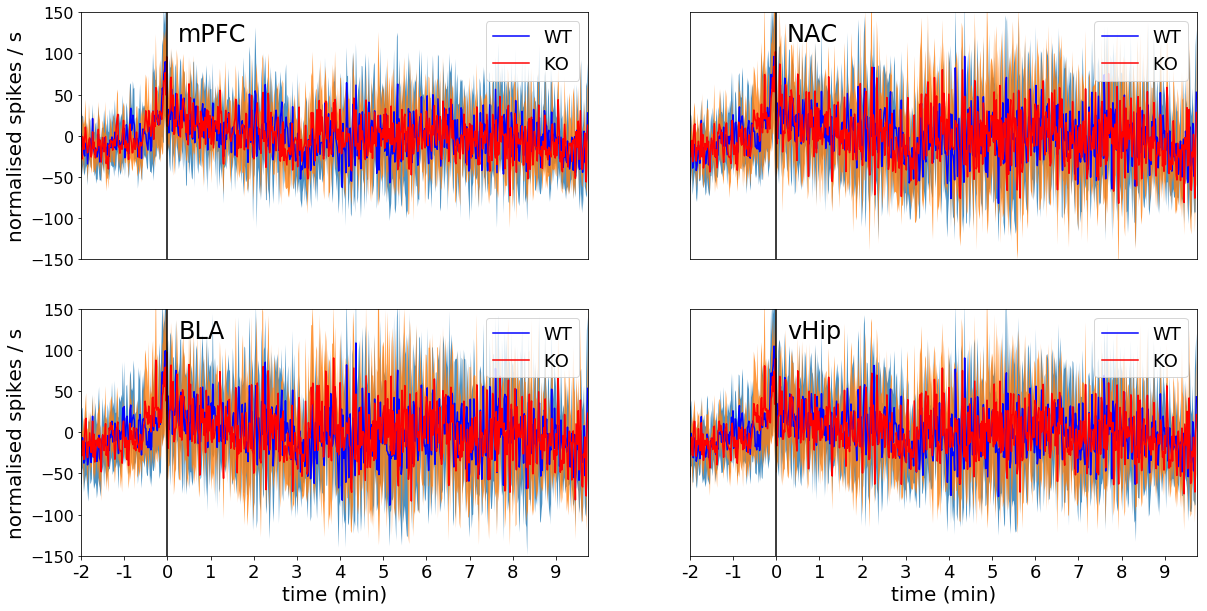

In [12]:
structures = ['mPFC', 'NAC', 'BLA', 'vHip']

plt.figure(figsize=(20,10))
subplot_index = 1
for structure in structures:
    tmean_WT = WT_grandAverage[structure]['mean']
    tsem_WT  = WT_grandAverage[structure]['sem']
    tmean_KO = KO_grandAverage[structure]['mean']
    tsem_KO  = KO_grandAverage[structure]['sem']

    total_time = tmean_KO.shape[0]
    tx = range(0, total_time)

    ### Plotting
    plt.subplot(2,2,subplot_index)
    plt.plot(tx, tmean_WT, '-', color='blue', alpha=1)
    plt.fill_between(tx, tmean_WT + tsem_WT, tmean_WT - tsem_WT, alpha=0.8)

    plt.plot(tx, tmean_KO, '-', color='red', alpha=1)
    plt.fill_between(tx, tmean_KO + tsem_KO, tmean_KO - tsem_KO, alpha=0.8)

    plt.xlim([0,total_time])
    plt.ylim([-150,150])
    plt.axvline(x=start_OF, color='black')
    
    plt.text(135, 115, structure, fontsize=24)
    plt.legend(['WT', 'KO'], fontsize=18, loc=1)
    
    if subplot_index in [3,4]:
        plt.xticks(np.arange(0, total_time, 60),
           ['-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize=18)
        plt.xlabel('time (min)', fontsize=20)

    if subplot_index in [1,2]:
        plt.xticks([])
        
    if subplot_index in [1,3]:
        plt.yticks(fontsize=16)
        plt.ylabel('normalised spikes / s', fontsize=20)
        
    if subplot_index in [2,4]:
        plt.yticks([])
    
    subplot_index += 1
    
    
plt.savefig('/home/maspe/filer/SERT/ALL/figs/spiking_activity.png', dpi=150, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png', transparent=False)


Figure X. Grand_average (thick lines) and standard deviations (shaded areas) of spiking activity (number of spikes divided by mean spikes per second) in each structure, for WT (blue) and KO (red) mice. In the x-axis, negative numbers indicate baseline (HC) activity; positive numbers, task (OF) activity. The lines at x=0 indicate the moment when mice start the OF. A windows of 15 s before and after the transition from HC to OF was excluded of the analysis. 

<Figure size 432x288 with 0 Axes>